# Exploratory Data Analysis
###### by Wilson Lee
###### Data Set : China Mobile User Gemographics Source
###### Link : https://www.kaggle.com/chinapage/china-mobile-user-gemographics

#### Business perspective
The objective of this analysis is to determine the viability of using the provided data to find the interest of the given population. With knowledge of the population interest will it be possible to generate a list of topics to encorage user app engagement. It would be ideal to use the generated topics as the inspiration for aplication development.

In [1]:
# import libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# convert sientific notation to decimals
pd.set_option("display.float_format", lambda x:"%.2f" % x)

## Load Cleaned Database

### Phone Data

In [2]:
df_phone_data = pd.read_csv("../../Data/Processed/device_model_count.csv", index_col=None)

### Label categories

In [3]:
df_label_categories = pd.read_csv("../../Data/Processed/label_categories.csv", index_col=None)

### Event Data

In [4]:
wDatabaseFolder = "../../Data/Processed/users_with_age/active_apps"

list_of_database = []
for wRoot, wDirs, wFiles in os.walk(wDatabaseFolder):
    for wFilename in wFiles:
        wCurrentFilename = os.path.join(wRoot, wFilename)
        list_of_database.append(pd.read_csv(wCurrentFilename, index_col=None))
            
df_active_app = pd.concat(list_of_database, axis=0, ignore_index= True)

# de-reference loaded dataframe list
list_of_database = []

## Preview Data

### Phone Data

In [5]:
df_phone_data

,phone_brand,device_model,count
0,Cool ratio,H1,5
1,Cool ratio,H1S,2
2,Cool ratio,H2,107
3,Cool ratio,H6,2
4,Cool ratio,M1,19
5,Cool ratio,MUSE,2
6,Cool ratio,S1,14
7,Cool ratio,S2,196
8,Cool ratio,S3,95
9,Cool ratio,S6,26


### Label Categories

In [6]:
df_label_categories

,label_id,category,category-mod,3d,80,90,abroad,academic,accommodation,accounting,...,weibo,weight,west,western,wifi,word,world,xianxia,zombie,zuma
0,2,game-game type,game game type,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,game-Game themes,game game theme,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,game-Art Style,game art style,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,game-Leisure time,game leisure time,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,game-Cutting things,game cutting thing,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,7,game-Finding fault,game finding fault,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,8,game-stress reliever,game stress reliever,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,game-pet,game pet,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,10,game-Answer,game answer,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,11,game-Fishing,game fishing,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Event Data

In [7]:
df_active_app

,event_id,is_active,3d,80,90,abroad,academic,accommodation,accounting,action,...,device_id,gender,age,group_y,phone_brand,device_model,longitude,latitude,hour,day_of_week
0,6,14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1476664663289716375,M,19,M22-,huawei,Mate 7,110.01,30.49,0,6
1,29,7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7166563712658305181,M,60,M39+,huawei,荣耀畅玩4C,117.96,28.47,0,6
2,35,11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-3449419341168524142,M,28,M27-28,huawei,荣耀3X畅玩版,110.01,30.49,0,6
3,39,10,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,-6542093539413689868,M,26,M23-26,huawei,荣耀畅玩4X,110.01,30.49,0,6
4,40,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-5638521260975573107,M,22,M22-,huawei,荣耀7,110.01,30.49,0,6
5,44,13,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,-4713356591613805069,M,25,M23-26,xiaomi,红米2,113.37,28.25,0,6
6,54,8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-7868922663453980926,F,27,F27-28,huawei,G660-L075,113.11,23.04,23,5
7,61,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-1593861387409811850,M,24,M23-26,xiaomi,红米Note3,110.40,25.31,0,6
8,70,7,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,8250516622760332376,M,28,M27-28,xiaomi,MI 3,121.68,31.12,0,6
9,82,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3230070203366080618,M,35,M32-38,huawei,Mate 7,110.01,30.49,0,6


## Normalize Event Data

### Check Individual User Events per Hour

In [8]:
df_events_per_user_per_hour = df_active_app[["device_id","day_of_week","hour"]].copy()
df_events_per_user_per_hour["count"] = 1
df_events_per_user_per_hour = df_events_per_user_per_hour.groupby(["device_id","day_of_week","hour"]).sum()
df_events_per_user_per_hour

count
device_id            day_of_week hour       
-9222956879900151005 4           15        6
                                 20        4
                                 21        3
                     5           7         1
                                 11        5
                                 12        4
                                 13        3
                                 14        3
                                 15        2
                                 23        2
-9221026417907250887 0           7         2
                                 8         2
                                 10        1
                                 20        2
                     1           7         2
                                 8         1
                                 9         1
                                 15        1
                                 22        1
                                 23        1
                     2           6         1
                                 7         2
                                 11        1
                                 13        1
                                 19        1
                                 22        1
                     3           6         4
                                 15        1
                                 18        1
                                 22        1
...                                      ...
 9220914901466458680 0           23        1
                     1           0         1
                                 5         1
                                 12        2
                                 23        1
                     2           6         1
                                 7         2
                                 13        1
                                 15        1
                                 18        2
                     3           6         4
                                 7         2
                                 12        1
                                 22        1
                                 23        1
                     4           6         1
                                 18        1
                                 20        1
                     5           0         1
                                 6         1
                                 19        1
                     6           5         1
                                 7         2
                                 8         1
                                 10        1
                                 11        2
                                 13        1
                                 16        1
                                 18        1
                                 19        1

[376606 rows x 1 columns]

### Reduce the Data to 1 Event Per User per Hour

In [9]:
df_normalized_active_app = df_active_app.drop('event_id', axis=1)
df_normalized_active_app = df_normalized_active_app.groupby(["device_id","gender","age","group_y","phone_brand","device_model","day_of_week","hour"]).mean().reset_index()
df_normalized_active_app

,device_id,gender,age,group_y,phone_brand,device_model,day_of_week,hour,is_active,3d,...,west,western,wifi,word,world,xianxia,zombie,zuma,longitude,latitude
0,-9222956879900151005,M,36,M32-38,samsung,Galaxy Note 2,4,15,23.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,113.24,23.19
1,-9222956879900151005,M,36,M32-38,samsung,Galaxy Note 2,4,20,21.50,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,113.24,23.19
2,-9222956879900151005,M,36,M32-38,samsung,Galaxy Note 2,4,21,22.67,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,113.24,23.19
3,-9222956879900151005,M,36,M32-38,samsung,Galaxy Note 2,5,7,21.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,113.24,23.19
4,-9222956879900151005,M,36,M32-38,samsung,Galaxy Note 2,5,11,16.40,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,113.24,23.19
5,-9222956879900151005,M,36,M32-38,samsung,Galaxy Note 2,5,12,29.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,113.24,23.19
6,-9222956879900151005,M,36,M32-38,samsung,Galaxy Note 2,5,13,22.67,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,113.24,23.19
7,-9222956879900151005,M,36,M32-38,samsung,Galaxy Note 2,5,14,18.33,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,113.24,23.19
8,-9222956879900151005,M,36,M32-38,samsung,Galaxy Note 2,5,15,17.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,113.24,23.19
9,-9222956879900151005,M,36,M32-38,samsung,Galaxy Note 2,5,23,21.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,113.24,23.19


### Get Individual User Interest Profile

In [10]:
df_user_profile = df_normalized_active_app.drop(["day_of_week","hour"], axis=1)
df_user_profile = df_user_profile.groupby(["device_id","gender","age","group_y","phone_brand","device_model"]).mean().reset_index()
df_user_profile

,device_id,gender,age,group_y,phone_brand,device_model,is_active,3d,80,90,...,west,western,wifi,word,world,xianxia,zombie,zuma,longitude,latitude
0,-9222956879900151005,M,36,M32-38,samsung,Galaxy Note 2,21.26,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,113.24,23.19
1,-9221026417907250887,F,31,F29-32,vivo,X5V,8.20,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,114.36,30.87
2,-9220830859283101130,M,19,M22-,huawei,G628,4.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,110.01,30.49
3,-9220061629197656378,M,40,M39+,huawei,Mate 8,1.83,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,124.89,46.62
4,-9218960997324667698,F,53,F43+,xiaomi,红米note,9.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,110.01,30.49
5,-9218769147970107256,M,23,M23-26,huawei,荣耀畅玩5X,1.38,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,112.33,28.59
6,-9217193238265898015,M,33,M32-38,vivo,Y923,4.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,110.01,30.49
7,-9216200545381120263,F,45,F43+,samsung,Galaxy Premier,7.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,110.01,30.49
8,-9215964883962797708,M,28,M27-28,OPPO,R827T,7.50,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,110.01,30.49
9,-9215766592714662253,F,34,F33-42,coolpad,大神F1,9.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,110.01,30.49


## Seperate Event by Gender

In [11]:
df_male_users_active_app = df_normalized_active_app[df_normalized_active_app['gender']=="M"]
df_female_users_active_app = df_normalized_active_app[df_normalized_active_app['gender']=="F"]

df_male_users_profile = df_user_profile[df_user_profile['gender']=="M"]
df_female_users_profile = df_user_profile[df_user_profile['gender']=="F"]

## Check Data distribution in time

### WeekDay

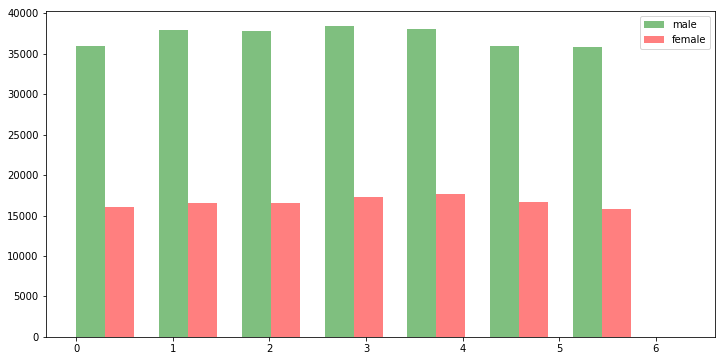

In [12]:
plt.figure(figsize=(12,6))
plt.hist(df_male_users_active_app['day_of_week'], bins=7, width=0.3, color="green", alpha=0.5, label='male')
plt.hist(df_female_users_active_app['day_of_week']+0.3, bins=7, width=0.3, color="red", alpha=0.5, label='female')
plt.legend(loc='upper right')
plt.show()

### Hour of Day

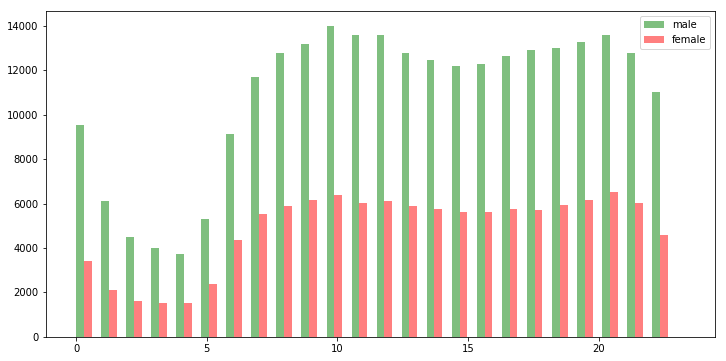

In [13]:
plt.figure(figsize=(12,6))
plt.hist(df_male_users_active_app['hour'], bins=24, width=0.3, color="green", alpha=0.5, label='male')
plt.hist(df_female_users_active_app['hour']+0.3, bins=24, width=0.3, color="red", alpha=0.5, label='female')
plt.legend(loc='upper right')
plt.show()


### Hour of Week

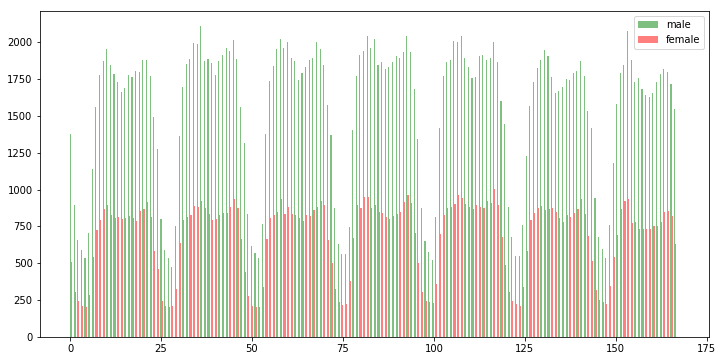

In [14]:
df_hour_dist_male = df_male_users_active_app[["day_of_week", "hour"]].copy()
df_hour_dist_male['Dist_24_7'] = df_hour_dist_male.apply(lambda x: x['day_of_week']*24 + x["hour"], axis=1)

df_hour_dist_female = df_female_users_active_app[["day_of_week", "hour"]].copy()
df_hour_dist_female['Dist_24_7'] = df_hour_dist_female.apply(lambda x: x['day_of_week']*24 + x["hour"], axis=1)

plt.figure(figsize=(12,6))
plt.hist(df_hour_dist_male['Dist_24_7'], bins=168, width=0.3, color="green", alpha=0.5, label='male')
plt.hist(df_hour_dist_female['Dist_24_7']+0.3, bins=168, width=0.3, color="red", alpha=0.5, label='female')
plt.legend(loc='upper right')
plt.show()

### Week day vs Hour plot

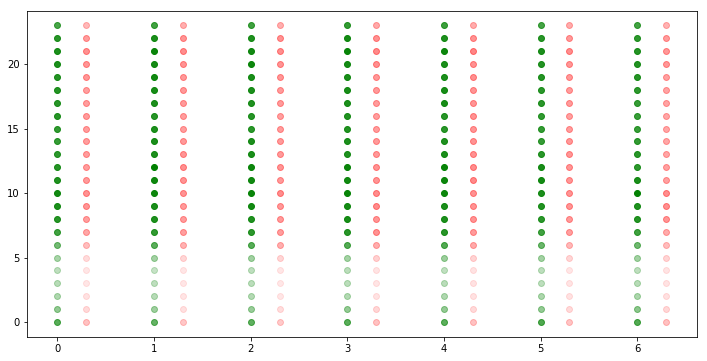

In [15]:
df_hour_dist_male_count = df_hour_dist_male.groupby(by=["day_of_week", "hour"]).count()
df_hour_dist_male_count.columns = ["count"]
df_hour_dist_male_count = df_hour_dist_male_count.reset_index();
max_user_at_hour  = df_hour_dist_male_count ["count"].max()

df_hour_dist_female_count = df_hour_dist_female.groupby(by=["day_of_week", "hour"]).count()
df_hour_dist_female_count.columns = ["count"]
df_hour_dist_female_count = df_hour_dist_female_count.reset_index();
max_user_at_hour2  = df_hour_dist_male_count ["count"].max()
if max_user_at_hour < max_user_at_hour2:
    max_user_at_hour = max_user_at_hour2

plt.figure(figsize=(12,6))
for index, row in df_hour_dist_male_count.iterrows():
    plt.plot(row['day_of_week'], row['hour'], 'o', color='green', alpha=row["count"]/max_user_at_hour)
for index, row in df_hour_dist_female_count.iterrows():
    plt.plot(row['day_of_week'] + 0.3, row['hour'], 'o', color='red', alpha=row["count"]/max_user_at_hour)
plt.show()


## User Age Distribution

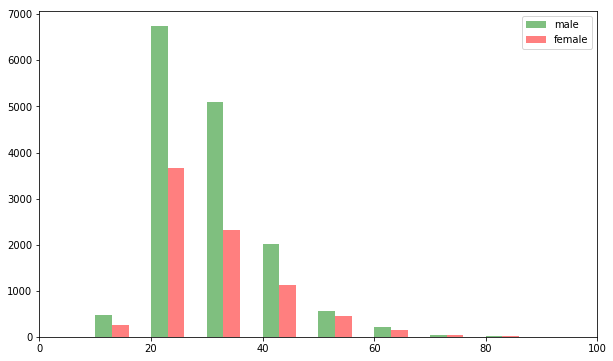

In [16]:
plt.figure(figsize=(10,6))

plt.xlim([0,100])

plt.hist(df_male_users_profile['age'], bins=[0,10,20,30,40,50,60,70,80,90], width=3, color="green", alpha=0.5, label='male')
plt.hist(df_female_users_profile['age'] + 3, bins=[3,13,23,33,43,53,63,73,83,93], width=3, color="red", alpha=0.5, label='female')
plt.legend(loc='upper right')
plt.show()


## Device Brand Distribution

### Number of Users per Phone Brand

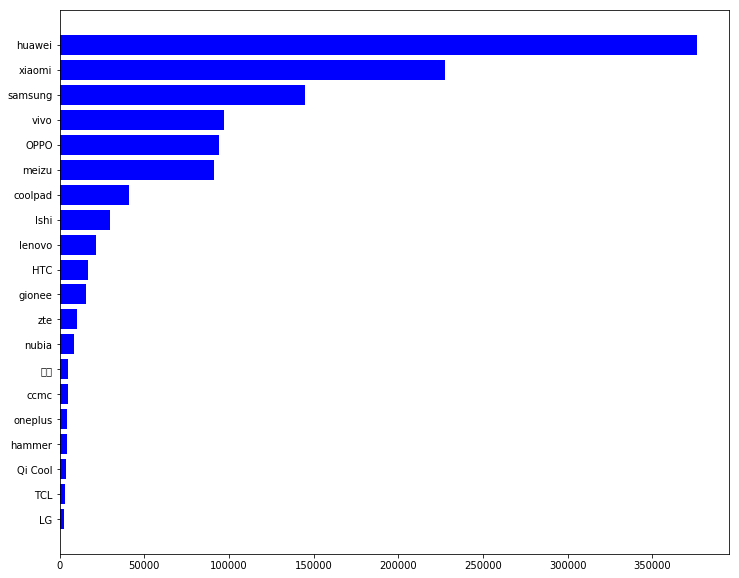

In [17]:
df_brand_count = df_phone_data.groupby(['phone_brand'])["count"].sum().reset_index()
df_brand_count = df_brand_count.sort_values(by=['count'])
df_brand_count = df_brand_count.tail(20)
plt.figure(figsize=(12,10))
plt.barh(df_brand_count['phone_brand'],df_brand_count['count'], color='blue', orientation='horizontal')
plt.show()

#### Male Users Phone Device Brand

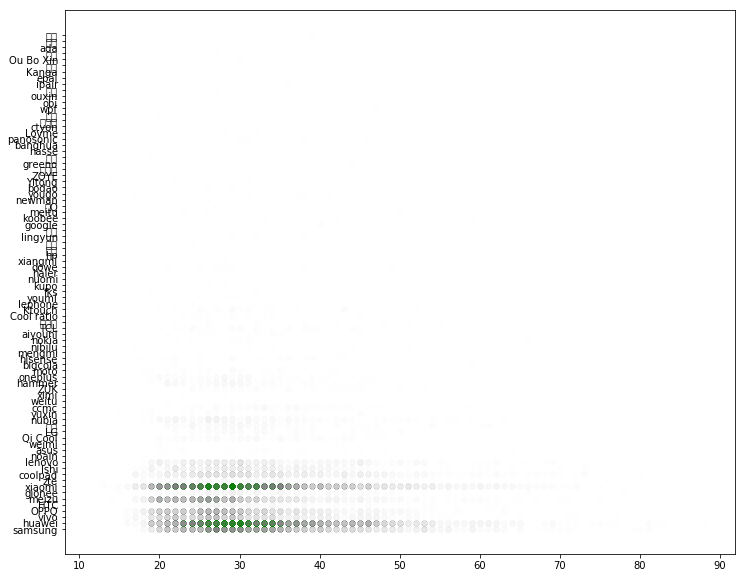

In [18]:
plt.figure(figsize=(12,10))
plt.plot(df_male_users_profile['age'], df_male_users_profile['phone_brand'], 'o', color='green', alpha=0.005, label='male')
plt.show()

#### Female Users Phone Device Brand

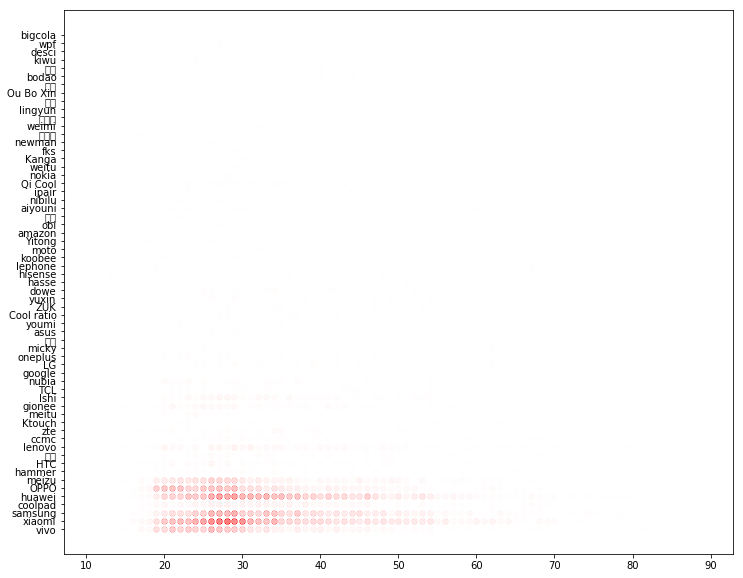

In [19]:
plt.figure(figsize=(12,10))
plt.plot(df_female_users_profile['age'], df_female_users_profile['phone_brand'], 'o', color='red', alpha=0.005, label='female')
plt.show()

## Event Interest Vector

### Extract Vector Columns

In [20]:
list_interest_vector = df_active_app.columns
list_exclude_columns = [ "event_id","is_active","device_id","gender","age","group_y","phone_brand","device_model","longitude","latitude","hour","day_of_week"]

temp = []
for word in list_interest_vector:
    if word in list_exclude_columns:
        continue
    else:
        temp.append(word)
list_interest_vector = temp

list_interest_vector

['3d',
 '80',
 '90',
 'abroad',
 'academic',
 'accommodation',
 'accounting',
 'action',
 'activity',
 'adventure',
 'advice',
 'advisory',
 'aggregate',
 'air',
 'aircraft',
 'airport',
 'alliance',
 'amoy',
 'animation',
 'answer',
 'antique',
 'app',
 'appliance',
 'application',
 'area',
 'around',
 'arpg',
 'art',
 'asia',
 'astrology',
 'audiobooks',
 'automotive',
 'aviation',
 'avoid',
 'baby',
 'ball',
 'bank',
 'banking',
 'based',
 'basketball',
 'beach',
 'beauty',
 'behalf',
 'big',
 'billards',
 'blog',
 'bobble',
 'bond',
 'book',
 'booking',
 'box',
 'brokerage',
 'browser',
 'bus',
 'business',
 'buy',
 'calendar',
 'car',
 'card',
 'care',
 'cartoon',
 'casual',
 'chain',
 'channel',
 'checkpoint',
 'chess',
 'child',
 'chinese',
 'church',
 'class',
 'classical',
 'clock',
 'coach',
 'collection',
 'college',
 'comfortable',
 'comic',
 'commodity',
 'community',
 'comparing',
 'competitive',
 'complex',
 'condition',
 'consumer',
 'contact',
 'content',
 'convenience

### Extract interest vector and time

#### Male Users

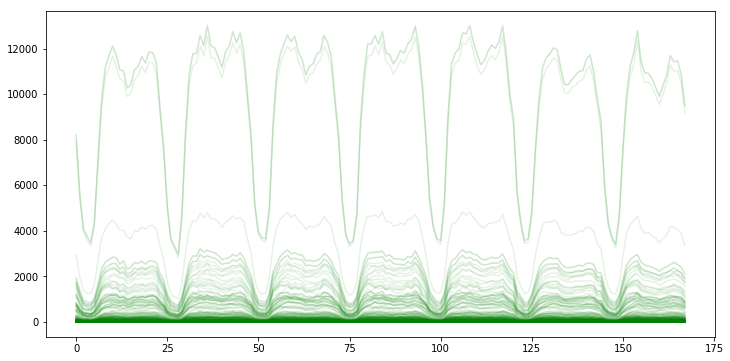

In [21]:
df_male_interest_vs_time = df_male_users_active_app.groupby(["day_of_week","hour"])[list_interest_vector].sum()
df_male_interest_vs_time = df_male_interest_vs_time.reset_index()

plt.figure(figsize=(12,6))
for word in list_interest_vector:
    plt.plot(df_male_interest_vs_time.index, df_male_interest_vs_time[word], '-', color='green', alpha=0.1)
plt.show()

#### Female Users

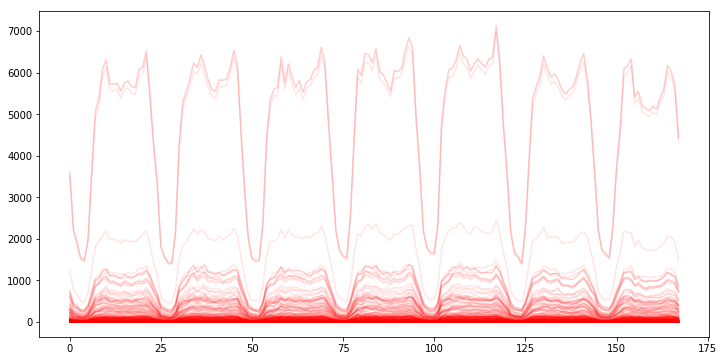

In [22]:
df_female_interest_vs_time = df_female_users_active_app.groupby(["day_of_week","hour"])[list_interest_vector].sum()
df_female_interest_vs_time = df_female_interest_vs_time.reset_index()

plt.figure(figsize=(12,6))
for word in list_interest_vector:
    plt.plot(df_female_interest_vs_time.index, df_female_interest_vs_time[word], '-', color='red', alpha=0.1)
plt.show()

#### Finding the Most Interested Labels

##### Male interest

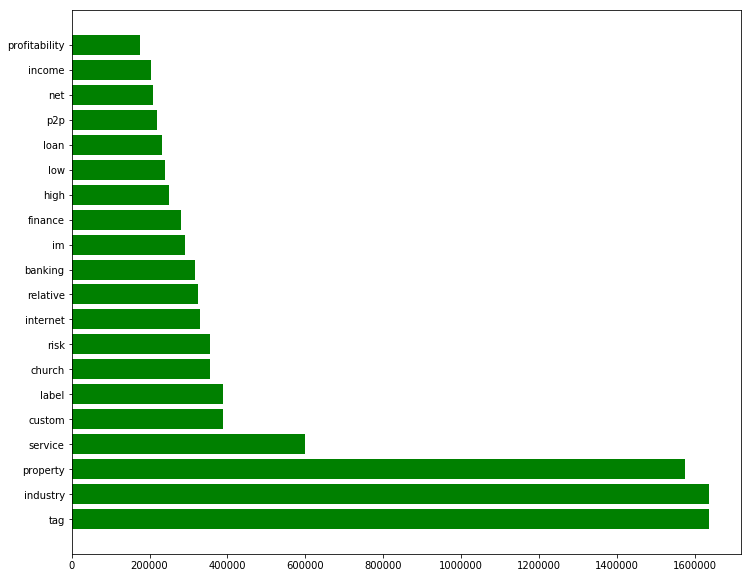

In [23]:
df_agg_male_interest = df_male_interest_vs_time.drop(["day_of_week","hour"], axis=1).sum().to_frame()
df_agg_male_interest.columns = ['count']
df_agg_male_interest = df_agg_male_interest.sort_values(by=['count'],ascending=False)
df_agg_male_interest = df_agg_male_interest.head(20)

plt.figure(figsize=(12,10))
plt.barh(df_agg_male_interest.index,df_agg_male_interest['count'], color='green')
plt.show()


##### Female Interest

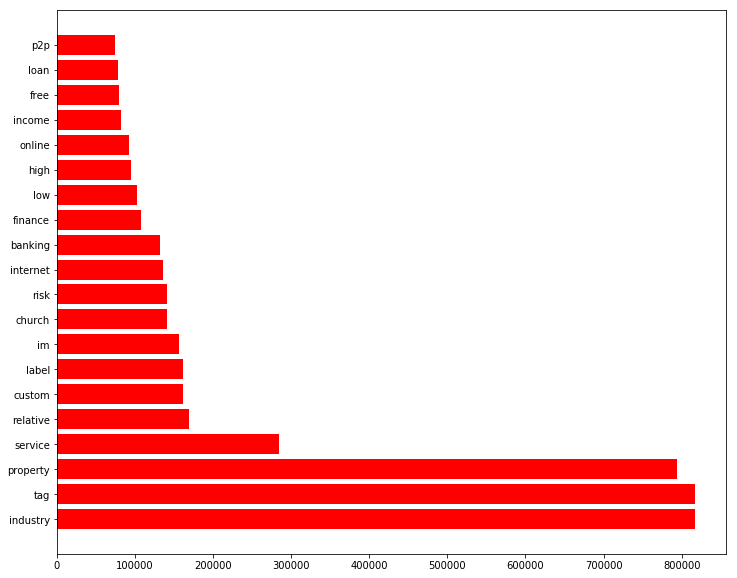

In [24]:
df_agg_female_interest = df_female_interest_vs_time.drop(["day_of_week","hour"], axis=1).sum().to_frame()
df_agg_female_interest.columns = ['count']
df_agg_female_interest = df_agg_female_interest.sort_values(by=['count'],ascending=False)
df_agg_female_interest = df_agg_female_interest.head(20)

plt.figure(figsize=(12,10))
plt.barh(df_agg_female_interest.index,df_agg_female_interest['count'], color='red')
plt.show()

#### Converting Interest to category

In [25]:
# top Interest ["service", "property", "tag", "industry"]
df_categories_of_interest = df_label_categories[(df_label_categories["service"] == 1)|(df_label_categories["property"] == 1)|(df_label_categories["tag"] == 1)|(df_label_categories["industry"] == 1)]
df_categories_of_interest = df_categories_of_interest.sort_values(by=["service", "property", "tag", "industry"],ascending=False)
df_categories_of_interest

,label_id,category,category-mod,3d,80,90,abroad,academic,accommodation,accounting,...,weibo,weight,west,western,wifi,word,world,xianxia,zombie,zuma
199,223,convenience services,convenience service,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
342,403,Domestic services,domestic service,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
408,470,Financial Planning Services,financial planning service,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
409,471,car services,car service,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
414,476,Wedding services,wedding service,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
415,477,KTV service,ktv service,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
437,512,Pet Services,pet service,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
483,558,service,service,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
610,713,Services 1,service,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
653,761,Financial Services,financial service,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
